In [120]:
# I dont need tweepy package, I supposed I already the data on my hand, firstly I import the packages 
# which I will need it during wrangling the data
# import tweepy
# from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

# 1.Gathering data 

In [121]:
# WeRateDog file form twitter which get it form API Twitter and saved it as .csv
twtr_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [122]:
twtr_archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [123]:
# Image predictions file
image_predictions= pd.read_csv('image-predictions.tsv',sep='\t')

In [124]:
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Query Twitter's API for JSON data for each tweet ID in the Twitter archive
### I supposed this file already have it! so there is no need to run this code because I did not install the tweepy package
count = 0
fails_dict = {}
start = timer()
### Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [125]:
# read the JSON file as dataframe
tweet_df =pd.read_json('tweet-json.txt', lines = True,encoding='utf-8')

In [126]:
tweet_df.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### I have finised the gathering phase, so we are going to the next phase which is assess; I collected three files which I will work in in next phases
##### 1. twtr_archive_df
##### 2. image_predictions
##### 3. tweet_df 

# 2. Assessing data

## 2.1 Asses the data visually

In [127]:
# firstly I am going to assess the data visually
# in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp; these attrbitues hava a NaN values 
# name, doggo,floofer,pupper and puppo; these attribitues have a None values
twtr_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [128]:
# this dataframe looks good visually
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [129]:
# possibly_sensitive_appealable, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status,
# quoted_status_id, quoted_status_id_str and quoted_status_id_str; these attrbitues have a NaN value
tweet_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### 1. twtr_archive_df
in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp; these attrbitues hava a NaN values 
name, doggo,floofer,pupper and puppo; these attribitues have a None values
### 2. image_predictions
This dataframe looks good visually
### 3. tweet_df 
possibly_sensitive_appealable, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status,
quoted_status_id, quoted_status_id_str and quoted_status_id_str; these attrbitues have a NaN value

## 2.1 Asses the data programmatically 

In [130]:
 twtr_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [131]:
 twtr_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [132]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [133]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [134]:
# Programmatical sampling on each of the dataframes
twtr_archive_df.sample(10)
# twtr_archive_df.rating_denominator.value_counts()
# twtr_archive_df.rating_denominator.value_counts()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
602,798644042770751489,NaN,NaN,2016-11-15 21:49:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Paull. He just stubbed ...,6.704450e+17,4.196984e+09,2015-11-28 03:31:48 +0000,https://twitter.com/dog_rates/status/670444955...,10,10,Paull,None,None,None,None
1462,694905863685980160,NaN,NaN,2016-02-03 15:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's a Bisquick Taj Mapaw. Too...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694905863...,10,10,Archie,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
226,848690551926992896,NaN,NaN,2017-04-03 00:16:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in animals other than dogs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848690551...,12,10,None,None,None,None,None
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,13,10,None,None,None,None,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @SchafeBacon2016: @dog_rates Slightly distu...,8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836...,11,10,None,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
1993,672609152938721280,NaN,NaN,2015-12-04 02:51:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Caryl. Likes to get in the microwave. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672609152...,9,10,Caryl,None,None,None,None
2097,670733412878163972,NaN,NaN,2015-11-28 22:38:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a great listener. Low main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670733412...,8,10,Jerry,None,None,None,None
1295,707983188426153984,7.079801e+17,2.319108e+09,2016-03-10 17:35:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@serial @MrRoles OH MY GOD I listened to all o...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [135]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1165,735274964362878976,https://pbs.twimg.com/media/CjQ4radW0AENP-m.jpg,1,studio_couch,0.944692,False,four-poster,0.007942,False,quilt,0.006302,False
809,692158366030913536,https://pbs.twimg.com/media/CZsKVxfWQAAXy2u.jpg,1,pug,0.956565,True,swing,0.018907,False,toy_poodle,0.013544,True
665,682750546109968385,https://pbs.twimg.com/media/CXmd_bsWkAEEXck.jpg,1,English_setter,0.947198,True,English_springer,0.031128,True,Brittany_spaniel,0.005512,True
914,700890391244103680,https://pbs.twimg.com/media/CboQFolWIAE04qE.jpg,1,white_wolf,0.166563,False,schipperke,0.122356,True,West_Highland_white_terrier,0.119247,True
1584,797236660651966464,https://pbs.twimg.com/media/CxBafisWQAAtJ1X.jpg,2,collie,0.767005,True,Border_collie,0.100844,True,kelpie,0.048368,True


In [136]:
tweet_df.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
773,2016-09-15 00:36:55+00:00,776218204058357768,776218204058357760,Atlas rolled around in some chalk and now he's...,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 776218187788611584, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33345,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1061,2016-06-10 00:39:48+00:00,741067306818797568,741067306818797568,This is just downright precious af. 12/10 for ...,False,"[0, 67]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 741067297519869955, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,10342,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1415,2016-02-13 16:50:04+00:00,698549713696649216,698549713696649216,This is Claude. He's trying to be seductive bu...,False,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 698549703420612608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2536,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
192,2017-04-21 16:33:22+00:00,855459453768019968,855459453768019968,"Guys, we only rate dogs. This is quite clearly...",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 855459446566400000, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,31657,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2192,2015-11-23 20:42:48+00:00,668892474547511297,668892474547511296,This is Ruffles. He is an Albanian Shoop Da Wh...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668892467224252416, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,422,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [137]:
twtr_archive_df.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
Aldrick       1
Glacier       1
Fletcher      1
Rupert        1
Reptar        1
Name: name, Length: 957, dtype: int64

In [138]:
twtr_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [139]:
tweet_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [140]:
assert [twtr_archive_df.duplicated() == False]

In [141]:
assert [image_predictions.duplicated() == False]

In [142]:
assert [tweet_df.id.duplicated() == False]

#### There is no duplicate values!

### Assessing Data for this Project
#### Quality Issues
* Unexpected values in rating_numeratro
* Unexpected values in rating_denominator
* twtr_archive_df datafarme contains 78 replies and 181 retweets which should not applied in the analysis.
* Some columns like (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id) are missing ‎too many values and might not be needed in this analysis.‎
* Source data column is not clear
* There are a lot of name of dogs which are clearly incorrect like these sample 'a', 'actually', 'all'
* Typo mistakes in the nomirator and the denominator
* There are some strange values in the p1 columns such as “school_bus, pillow, cartoon” ‎these cells must be checked first then deleted if not needed.
* Not all the data are in their most appropriate data type; firslty I will cheack them, but If I dont need them in anaylis I will delete them in clean phase.

#### Tidiness Issues 
* In the twtr_archive_df, there are 4 columns for doggo, floffer, pupper, and puppo but this is same categorical data that would be better in only 1 column
* there is None values and NaN and each of them indicate the missing values, so I will change teh None with NaN

# 3. Clean

In [143]:
twtr_archive_df[twtr_archive_df['rating_denominator'] == 0 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [144]:
# Delete the rows which have rating_denominator = 0 
twtr_archive_df.drop(index= 313)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [145]:
twtr_archive_df[twtr_archive_df['rating_numerator'] == 0 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [146]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
hand_blower             1
flamingo                1
marmot                  1
military_uniform        1
nail                    1
Name: p1, Length: 378, dtype: int64

In [147]:
group_rare_things_p1= image_predictions.groupby('p1').filter(lambda x: len(x) < 3)

In [148]:
group_rare_things_p1.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
166,668981893510119424,https://pbs.twimg.com/media/CUize-0WEAAerAK.jpg,1,jellyfish,0.447246,False,coral_reef,0.238625,False,goldfish,0.040227,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
954,705223444686888960,https://pbs.twimg.com/media/Ccl0-HVVAAAf8aK.jpg,1,Egyptian_cat,0.090508,False,Chesapeake_Bay_retriever,0.077373,True,Mexican_hairless,0.049472,True
544,677301033169788928,https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg,1,Japanese_spaniel,0.661178,True,Pekinese,0.150119,True,Chihuahua,0.119720,True
608,680070545539371008,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,1,earthstar,0.127701,False,Shih-Tzu,0.121811,True,bubble,0.117820,False
1242,747204161125646336,https://pbs.twimg.com/media/Cl6aOBhWEAALuti.jpg,2,coil,0.533699,False,dugong,0.087959,False,rain_barrel,0.039221,False
143,668620235289837568,https://pbs.twimg.com/media/CUdqjvAWUAANfoU.jpg,1,crash_helmet,0.757942,False,toaster,0.037497,False,mouse,0.027271,False
811,692417313023332352,https://pbs.twimg.com/media/CZv13u5WYAA6wQe.jpg,1,bison,0.208922,False,mink,0.169945,False,polecat,0.144494,False
1244,747461612269887489,https://pbs.twimg.com/media/Cl-EXHSWkAE2IN2.jpg,1,binoculars,0.192717,False,barbershop,0.085838,False,ballplayer,0.084672,False
1171,736365877722001409,https://pbs.twimg.com/media/CjgYyuvWkAAHU8g.jpg,3,cup,0.473555,False,toy_poodle,0.082606,True,consomme,0.048298,False


In [149]:
# degress form 378 rows to 271 rows
len(group_rare_things_p1) 

271

In [150]:
tweet_df['id'].sample(5)

2213    668542336805281792
174     857989990357356544
352     831309418084069378
1012    747204161125646336
1029    745422732645535745
Name: id, dtype: int64

In [151]:
# compare tweet_status.created_at and tw_archive.timestamp

filter_tweet_df1 = tweet_df.filter(['id','created_at'])
filter_tweet_df1 = filter_tweet_df1.rename(columns={'id': 'tweet_id'})
filter_twt_archive_df2 = twtr_archive_df.filter(['tweet_id', 'timestamp'])

merge_between_df1_df2 = pd.merge(filter_tweet_df1, filter_twt_archive_df2, how='inner', on=['tweet_id'])

In [152]:
merge_between_df1_df2.sample(5)

,tweet_id,created_at,timestamp
1414,698635131305795584,2016-02-13 22:29:29+00:00,2016-02-13 22:29:29 +0000
1529,690015576308211712,2016-01-21 03:38:27+00:00,2016-01-21 03:38:27 +0000
307,835574547218894849,2017-02-25 19:37:50+00:00,2017-02-25 19:37:50 +0000
1646,683773439333797890,2016-01-03 22:14:26+00:00,2016-01-03 22:14:26 +0000
1589,686606069955735556,2016-01-11 17:50:18+00:00,2016-01-11 17:50:18 +0000


In [153]:
len(merge_between_df1_df2)

2354

### 3.1 clean twtr_archive_df file and name it as twitter_archive_cleaned

In [154]:
# create a cleaned dataframe from the archive
twitter_archive_cleaned = twtr_archive_df.copy()

In [155]:
# test
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [156]:
# Define: Select rows wehre the column "in_reply_to_status_id" is Null (this will exclude all the retweets)

#Code
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned['in_reply_to_status_id'].isnull()]

In [157]:
# test
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2274 non-null   object 
 10  rating_numerator            2278 non-null   int64  
 11  rating_denominator          2278 non-null   int64  
 12  name                        2278 non-null   object 
 13  doggo                       2278 

In [158]:
# Define: Dropping unneded (missing too much values) columns using drop function.
# code
twitter_archive_cleaned = twitter_archive_cleaned.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [159]:
# Test
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2278 non-null   int64 
 1   timestamp           2278 non-null   object
 2   source              2278 non-null   object
 3   text                2278 non-null   object
 4   expanded_urls       2274 non-null   object
 5   rating_numerator    2278 non-null   int64 
 6   rating_denominator  2278 non-null   int64 
 7   name                2278 non-null   object
 8   doggo               2278 non-null   object
 9   floofer             2278 non-null   object
 10  pupper              2278 non-null   object
 11  puppo               2278 non-null   object
dtypes: int64(3), object(9)
memory usage: 231.4+ KB


In [160]:
# Define: I do not need 'expanded_urls' in my analysis. use drop function
# Code
twitter_archive_cleaned = twitter_archive_cleaned.drop(['expanded_urls'], axis = 1)

In [161]:
# Test
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2278 non-null   int64 
 1   timestamp           2278 non-null   object
 2   source              2278 non-null   object
 3   text                2278 non-null   object
 4   rating_numerator    2278 non-null   int64 
 5   rating_denominator  2278 non-null   int64 
 6   name                2278 non-null   object
 7   doggo               2278 non-null   object
 8   floofer             2278 non-null   object
 9   pupper              2278 non-null   object
 10  puppo               2278 non-null   object
dtypes: int64(3), object(8)
memory usage: 213.6+ KB


In [162]:
# Define: use loc to correct the typo mistakes in specified cells
# Code
twitter_archive_cleaned.loc[twitter_archive_cleaned['rating_numerator'] == 50, ['rating_numerator']] == 10
twitter_archive_cleaned.loc[twitter_archive_cleaned['rating_denominator'] == 50, ['rating_denominator']] == 10

twitter_archive_cleaned.loc[twitter_archive_cleaned['rating_numerator'] == 88, ['rating_numerator']] == 11
twitter_archive_cleaned.loc[twitter_archive_cleaned['rating_denominator'] == 80, ['rating_denominator']] == 10
twitter_archive_cleaned.loc[twitter_archive_cleaned['rating_numerator'] == 80, ['rating_numerator']] == 10
twitter_archive_cleaned.loc[twitter_archive_cleaned['rating_denominator'] == 80, ['rating_denominator']] == 10


twitter_archive_cleaned.loc[twitter_archive_cleaned['rating_numerator'] == 44, ['rating_numerator']] == 11
twitter_archive_cleaned.loc[twitter_archive_cleaned['rating_denominator'] == 40, ['rating_denominator']] == 10

,rating_denominator
1433,False


In [163]:
# test
twitter_archive_cleaned[twitter_archive_cleaned['rating_numerator'] > 20 ]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",75,10,Logan,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,165,150,None,None,None,None,None
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,1776,10,Atticus,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,204,170,this,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,99,90,None,None,None,None,None


In [164]:
len(twitter_archive_cleaned[twitter_archive_cleaned['rating_numerator'] > 20 ])

19

In [165]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2278 non-null   int64 
 1   timestamp           2278 non-null   object
 2   source              2278 non-null   object
 3   text                2278 non-null   object
 4   rating_numerator    2278 non-null   int64 
 5   rating_denominator  2278 non-null   int64 
 6   name                2278 non-null   object
 7   doggo               2278 non-null   object
 8   floofer             2278 non-null   object
 9   pupper              2278 non-null   object
 10  puppo               2278 non-null   object
dtypes: int64(3), object(8)
memory usage: 213.6+ KB


### Define: exclude all extreme and zero values from the numertor and denuminator
### Code

In [166]:
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned['rating_numerator'] != 0 ]
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned['rating_denominator'] >= 10 ]
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned['rating_numerator'] <= 20 ]
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned['rating_denominator'] < 20 ]

### test

In [167]:
len(twitter_archive_cleaned[twitter_archive_cleaned['rating_numerator'] > 20 ])

0

In [168]:
len(twitter_archive_cleaned[twitter_archive_cleaned['rating_denominator'] > 20 ])


0

In [169]:
len(twitter_archive_cleaned[twitter_archive_cleaned['rating_denominator'] < 10 ])

0

### Define: replace the value 'None' with the NaN (missing value)

### Code:

In [170]:

twitter_archive_cleaned =  twitter_archive_cleaned.replace('None', np.nan)

### Test

In [171]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2256 non-null   int64 
 1   timestamp           2256 non-null   object
 2   source              2256 non-null   object
 3   text                2256 non-null   object
 4   rating_numerator    2256 non-null   int64 
 5   rating_denominator  2256 non-null   int64 
 6   name                1601 non-null   object
 7   doggo               93 non-null     object
 8   floofer             10 non-null     object
 9   pupper              252 non-null    object
 10  puppo               29 non-null     object
dtypes: int64(3), object(8)
memory usage: 211.5+ KB


### Define: use loc to add a new column dog_class = doggo, floofer, pupper or poppo. NaN will be used if not any of the previous

### Code

In [172]:

twitter_archive_cleaned.loc[twitter_archive_cleaned['puppo'] == 'puppo', 'dog_class'] = 'puppo'


In [173]:
twitter_archive_cleaned.sample(10)


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_class
294,837482249356513284,2017-03-03 01:58:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's a ship captain in real l...,13,10,Waffles,NaN,NaN,NaN,NaN,NaN
437,820078625395449857,2017-01-14 01:22:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've never wanted to go to a camp more in my e...,12,10,NaN,NaN,NaN,NaN,NaN,NaN
12,889665388333682689,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,13,10,NaN,NaN,NaN,NaN,puppo,puppo
1947,673700254269775872,2015-12-07 03:07:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Large blue dog here. Cool shades. Flipping us ...,3,10,NaN,NaN,NaN,NaN,NaN,NaN
209,852226086759018497,2017-04-12 18:25:07 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet General. He wasn't content with the quali...,14,10,General,NaN,NaN,NaN,NaN,NaN
652,792394556390137856,2016-10-29 15:55:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet BeBe. She rocks the messy bun of your dre...,12,10,BeBe,NaN,NaN,NaN,NaN,NaN
894,759197388317847553,2016-07-30 01:22:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. She's just heckin precious af I ...,12,10,Luna,NaN,NaN,NaN,NaN,NaN
1166,722613351520608256,2016-04-20 02:30:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Schnitzel. He's a Tropicana Floofboop. Ge...,12,10,Schnitzel,NaN,NaN,NaN,NaN,NaN
2060,671182547775299584,2015-11-30 04:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup holds the secrets of the universe in ...,12,10,NaN,NaN,NaN,NaN,NaN,NaN
2230,668237644992782336,2015-11-22 01:20:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Torque. He served his nickel. Better n...,10,10,Torque,NaN,NaN,NaN,NaN,NaN


### Test

In [174]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2256 non-null   int64 
 1   timestamp           2256 non-null   object
 2   source              2256 non-null   object
 3   text                2256 non-null   object
 4   rating_numerator    2256 non-null   int64 
 5   rating_denominator  2256 non-null   int64 
 6   name                1601 non-null   object
 7   doggo               93 non-null     object
 8   floofer             10 non-null     object
 9   pupper              252 non-null    object
 10  puppo               29 non-null     object
 11  dog_class           29 non-null     object
dtypes: int64(3), object(9)
memory usage: 229.1+ KB


### Define dropping unneded doggo, floofer, pupper or poppo columns
### Code

In [175]:

twitter_archive_cleaned = twitter_archive_cleaned.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

### Test

In [176]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2256 non-null   int64 
 1   timestamp           2256 non-null   object
 2   source              2256 non-null   object
 3   text                2256 non-null   object
 4   rating_numerator    2256 non-null   int64 
 5   rating_denominator  2256 non-null   int64 
 6   name                1601 non-null   object
 7   dog_class           29 non-null     object
dtypes: int64(3), object(5)
memory usage: 158.6+ KB


#### After this operations I droped these 'doggo', 'floofer', 'pupper', 'puppo' columes and make it in one which is dog_class and the data have not valued I give it as NaN          

### 3.2 clean image_predictions file and name it as image_predictions_cleaned

In [177]:
image_predictions_cleaned = image_predictions.copy()

In [178]:
image_predictions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Define: rename columns p1,p2,p3 

### Code

In [179]:
image_predictions_cleaned= image_predictions_cleaned.rename(columns={'p1':'breed_probability1', 'p2':'breed_probability2', 'p3':'breed_probability3'})

### Test

In [180]:
image_predictions_cleaned.head()

,tweet_id,jpg_url,img_num,breed_probability1,p1_conf,p1_dog,breed_probability2,p2_conf,p2_dog,breed_probability3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define: Exclude all rows with P1_confidence less than 0.5

### Code: 

In [181]:
image_predictions_cleaned = image_predictions_cleaned[image_predictions_cleaned['p1_conf'] > 0.5 ]

### test

In [182]:
assert [image_predictions_cleaned[image_predictions_cleaned['p1_conf'] > 0.5 ]]

### Define: use filter to select only needed columns

### Code

In [183]:
image_predictions_cleaned = image_predictions_cleaned.filter(['tweet_id','breed_probability1','p1_conf'])

### test 

In [184]:
image_predictions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 1 to 2072
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1239 non-null   int64  
 1   breed_probability1  1239 non-null   object 
 2   p1_conf             1239 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.7+ KB


### Define: use groupby to select not rare things in the data (frequency more than 3)

### Code

In [185]:
image_predictions_cleaned = image_predictions_cleaned.groupby('breed_probability1').filter(lambda x: len(x) > 3)

### Test

In [186]:
image_predictions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 2 to 2072
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            987 non-null    int64  
 1   breed_probability1  987 non-null    object 
 2   p1_conf             987 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.8+ KB


### 3.3 clean tweet_df file and name it as tweet_df_cleaned

In [187]:
tweet_df_cleaned = tweet_df.copy()

In [188]:
tweet_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Define: rename the column id 

### Code

In [189]:
tweet_df_cleaned = tweet_df_cleaned.rename(columns={'id':'tweet_id'})

### Test

In [190]:
tweet_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Define: filter/select needed columns
### Code

In [191]:
tweet_df_cleaned = tweet_df_cleaned.filter(['tweet_id','favorite_count','retweet_count', 'source', 'user'] )

### test

In [192]:
tweet_df_cleaned.head()

,tweet_id,favorite_count,retweet_count,source,user
0,892420643555336193,39467,8853,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,33819,6514,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,25461,4328,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,42908,8964,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,41048,9774,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."


### I am going to merge dataframes to form a last one which we are going to make more analystic on

In [193]:
# twitter_archive_cleaned image_predictions_cleaned tweet_df_cleaned
tweeters_df = pd.merge(twitter_archive_cleaned, image_predictions_cleaned, how='outer', on=['tweet_id'])


In [194]:
tweeters_df = pd.merge(tweeters_df, tweet_df_cleaned, how='outer', on=['tweet_id'])


In [195]:
tweeters_df.sample(10)

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,dog_class,breed_probability1,p1_conf,favorite_count,retweet_count,source_y,user
1884,672995267319328768,2015-12-05 04:25:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pumpkin. He can look in two different ...,8.0,10.0,Pumpkin,NaN,French_bulldog,0.719559,1001.0,328.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
2156,667782464991965184,2015-11-20 19:12:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Super rare dog. Endangered (?). Thinks it's fu...,9.0,10.0,NaN,NaN,NaN,NaN,434.0,261.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
849,759846353224826880,2016-07-31 20:21:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kirby. He's a Beneblip Cumberpat. Pret...,11.0,10.0,Kirby,NaN,NaN,NaN,7433.0,2265.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1301,703268521220972544,2016-02-26 17:20:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Friday here's a sleepy pupper 12/10 http...,12.0,10.0,NaN,NaN,NaN,NaN,2152.0,618.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1742,676575501977128964,2015-12-15 01:32:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is very passionate about Christmas...,8.0,10.0,NaN,NaN,NaN,NaN,2807.0,1254.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1415,693486665285931008,2016-01-30 17:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lincoln. He doesn't understand his new...,11.0,10.0,Lincoln,NaN,NaN,NaN,1941.0,698.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1678,678774928607469569,2015-12-21 03:12:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tug. He's not required to wear the con...,11.0,10.0,Tug,NaN,NaN,NaN,3037.0,1043.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
175,856602993587888130,2017-04-24 20:17:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Luna. It's her first ti...,13.0,10.0,Luna,NaN,NaN,NaN,0.0,11633.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
841,760539183865880579,2016-08-02 18:14:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Atlas. Swinging is his passion. 12/10 ...,12.0,10.0,Atlas,NaN,Samoyed,0.988013,8399.0,4168.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1773,675517828909424640,2015-12-12 03:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 stay woke https://t.co/XDiQw4Akiw,12.0,10.0,NaN,NaN,NaN,NaN,1414.0,507.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [196]:
tweeters_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   timestamp           2256 non-null   object 
 2   source_x            2256 non-null   object 
 3   text                2256 non-null   object 
 4   rating_numerator    2256 non-null   float64
 5   rating_denominator  2256 non-null   float64
 6   name                1601 non-null   object 
 7   dog_class           29 non-null     object 
 8   breed_probability1  987 non-null    object 
 9   p1_conf             987 non-null    float64
 10  favorite_count      2354 non-null   float64
 11  retweet_count       2354 non-null   float64
 12  source_y            2354 non-null   object 
 13  user                2354 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 276.1+ KB


In [197]:
tweeters_df.to_csv('twitter_archive_master.csv')

# Analyzing the Data and draw the plots to make the analytics more scene

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [199]:
tw_master = pd.read_csv('twitter_archive_master.csv')

### Plot the DoggoLingo with ratings

Text(0, 0.5, 'Rating')

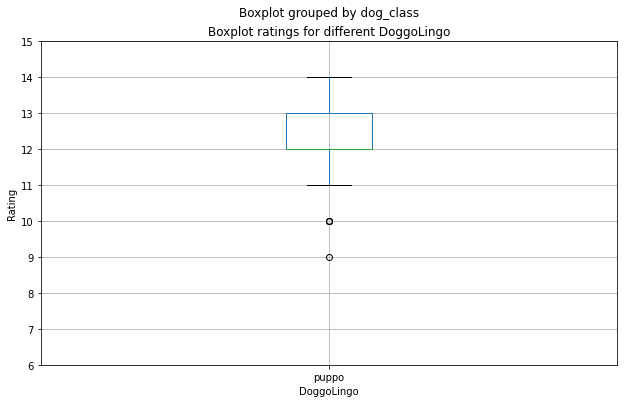

In [200]:
# Plot the DoggoLingo with ratings
plt.rcParams['figure.figsize']=(10,6)
tw_master[pd.notnull(tw_master['dog_class'])].boxplot(column = ['rating_numerator'], by = ['dog_class'])
plt.ylim((6,15))
plt.title('Boxplot ratings for different DoggoLingo')
plt.xlabel('DoggoLingo')
plt.ylabel('Rating')

#### The box plot indicates that there is more consistency in rating puppo dogs high. There is also more consistency in rating the pupper dogs less than the others.

### Plot the DoggoLingo with retweets


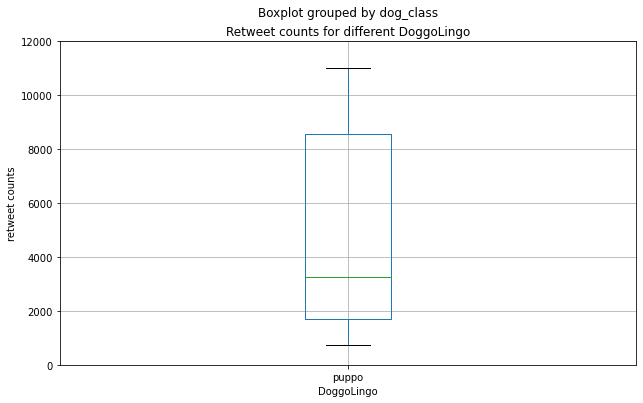

In [201]:
# Plot the DoggoLingo with retweets
plt.rcParams['figure.figsize']=(10,6)
tw_master[pd.notnull(tw_master['dog_class'])].boxplot(column = ['retweet_count'], by = ['dog_class'])
plt.ylim((0,12000))
plt.title('Retweet counts for different DoggoLingo')
plt.xlabel('DoggoLingo')
plt.ylabel('retweet counts');

#### Puppos were retweeted more than the others on average.

### Plot the DoggoLingo with favourite counts

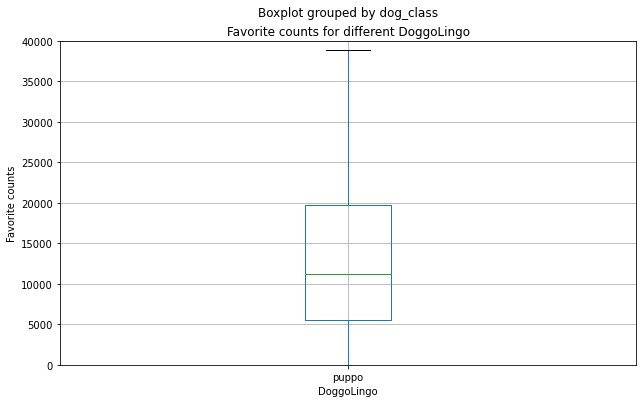

In [202]:
plt.rcParams['figure.figsize']=(10,6)
tw_master[pd.notnull(tw_master['dog_class'])].boxplot(column = ['favorite_count'], by = ['dog_class'])
plt.ylim((0,40000))
plt.title('Favorite counts for different DoggoLingo')
plt.xlabel('DoggoLingo')
plt.ylabel('Favorite counts');

#### Puppos received consistently more favorite than the others.

### Is there a specific breed that has more retweets and favourite record than the others?¶


In [203]:
df = tw_master[pd.notnull(tw_master.breed_probability1)]

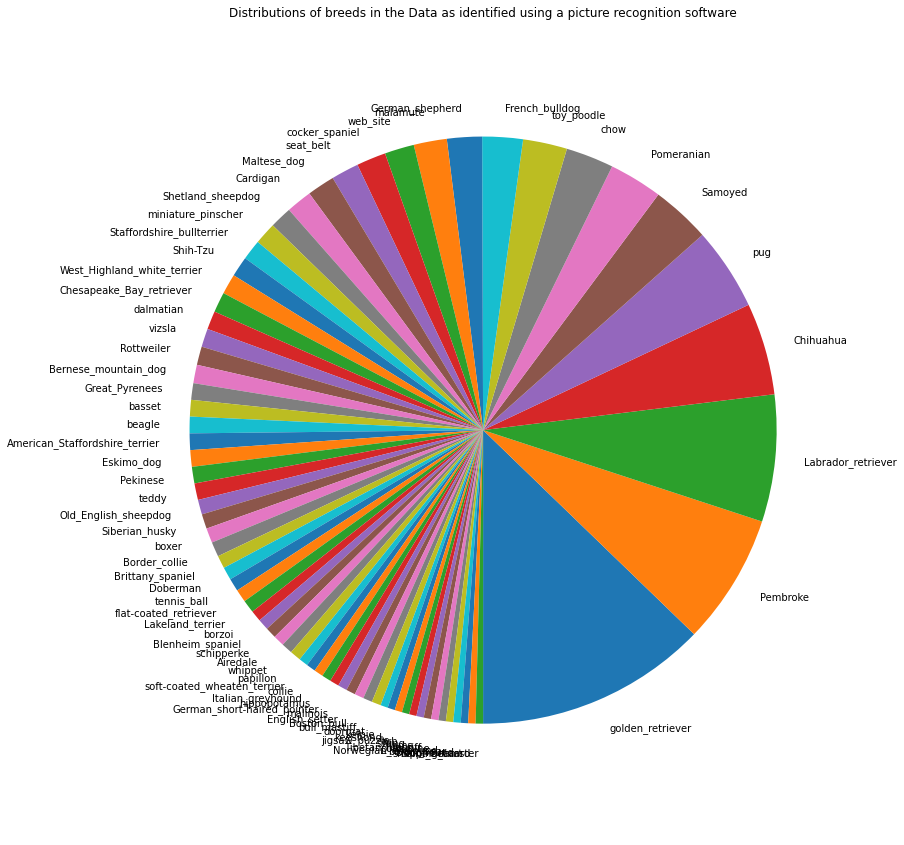

In [204]:
plt.rcParams['figure.figsize']=(15,15)

import matplotlib.pyplot as plt
df.breed_probability1.value_counts(sort=True).plot.pie(startangle=270, pctdistance=0.8, radius = 0.9)
plt.title('Distributions of breeds in the Data as identified using a picture recognition software')
plt.ylabel('')
plt.show();

#### Golden retriever, pembroke, Labrador retriever and Chihuahua are the most common dog breeds. Some strange values like Seat-Belt still exist in the data which need to be cleaned.
#### There are 73 different breeds in this data (Note: that appeared more than 3 times). Some strange values like "Seat Belt" still exist in the data and need to be cleaned

#### 1)  Is there a specific breed that received more favorite than the others?¶


In [205]:
df1 = df[['breed_probability1', 'favorite_count']] 
df1.sort_values('favorite_count', ascending = False).groupby(['breed_probability1'], sort = False).describe().head()

favorite_count                                              \
                            count          mean           std    min      25%   
breed_probability1                                                              
Labrador_retriever           69.0  13143.072464  19556.336568    0.0  2169.00   
Chihuahua                    50.0   8544.140000  16490.536087    0.0  1226.25   
French_bulldog               22.0  18099.363636  23878.067337  341.0  3315.75   
golden_retriever            126.0  11490.714286  12975.141273    0.0  3246.00   
Eskimo_dog                    9.0  17148.000000  23181.141026  550.0  3809.00   

                                                
                       50%       75%       max  
breed_probability1                              
Labrador_retriever  6569.0  17063.00  131075.0  
Chihuahua           3077.0  10564.00  107015.0  
French_bulldog      9335.5  25477.00  106827.0  
golden_retriever    7479.5  16029.75   85011.0  
Eskimo_dog          7908.0  17379.00   75163.0

In [206]:
df1 = df[['breed_probability1', 'favorite_count']] 
df2 = df1.sort_values('favorite_count', ascending = False).groupby(['breed_probability1'], sort = False).describe()
df2.sort_values(('favorite_count', 'mean'), ascending = False).head()

favorite_count                                      \
                                  count          mean           std     min   
breed_probability1                                                            
swing                               4.0  26663.000000  24442.574973  8157.0   
hippopotamus                        5.0  20152.800000  15549.216112     0.0   
French_bulldog                     22.0  18099.363636  23878.067337   341.0   
Eskimo_dog                          9.0  17148.000000  23181.141026   550.0   
Chesapeake_Bay_retriever           11.0  15104.272727  20345.771836   227.0   

                                                                
                               25%      50%      75%       max  
breed_probability1                                              
swing                     11134.50  18350.5  33879.0   61794.0  
hippopotamus              11252.00  20275.0  28996.0   40241.0  
French_bulldog             3315.75   9335.5  25477.0  106827.0  
Eskimo_dog                 3809.00   7908.0  17379.0   75163.0  
Chesapeake_Bay_retriever   4324.00   7335.0  17379.5   71144.0

#### A dog from the Labrador_retriever breed received the maximum number of favourites (164825). On average, Swings received higher favourites (average = 31424) than the others. In the second place for favourites comes the Eskimo_dog (average = 21996).

#### Is there a specific breed that received more retweets than the others?

In [207]:
df1 = df[['breed_probability1', 'retweet_count']] 
df1.sort_values('retweet_count', ascending = False).groupby(['breed_probability1'], sort = False).describe().head()

retweet_count                                               \
                           count          mean           std     min      25%   
breed_probability1                                                              
Labrador_retriever          69.0   5214.434783  10491.457715    96.0   907.00   
Chihuahua                   50.0   4398.340000  11005.679309    52.0   552.50   
Eskimo_dog                   9.0   7826.555556  16803.662511   163.0  1176.00   
French_bulldog              22.0   4933.954545   7415.783261   123.0   847.75   
swing                        4.0  10243.750000  13672.163627  2873.0  3300.50   

                                               
                       50%       75%      max  
breed_probability1                             
Labrador_retriever  2269.0   5134.00  79515.0  
Chihuahua           1328.0   3569.25  56625.0  
Eskimo_dog          2243.0   3220.00  52360.0  
French_bulldog      2705.5   4571.00  32883.0  
swing               3680.0  10623.25  30742.0

In [208]:
df1 = df[['breed_probability1', 'favorite_count']] 
df2 = df1.sort_values('favorite_count', ascending = False).groupby(['breed_probability1'], sort = False).describe()
df2.sort_values(('favorite_count', 'mean'), ascending = False).head()

favorite_count                                      \
                                  count          mean           std     min   
breed_probability1                                                            
swing                               4.0  26663.000000  24442.574973  8157.0   
hippopotamus                        5.0  20152.800000  15549.216112     0.0   
French_bulldog                     22.0  18099.363636  23878.067337   341.0   
Eskimo_dog                          9.0  17148.000000  23181.141026   550.0   
Chesapeake_Bay_retriever           11.0  15104.272727  20345.771836   227.0   

                                                                
                               25%      50%      75%       max  
breed_probability1                                              
swing                     11134.50  18350.5  33879.0   61794.0  
hippopotamus              11252.00  20275.0  28996.0   40241.0  
French_bulldog             3315.75   9335.5  25477.0  106827.0  
Eskimo_dog                 3809.00   7908.0  17379.0   75163.0  
Chesapeake_Bay_retriever   4324.00   7335.0  17379.5   71144.0


#### A dog from the Labrador_retriever breed received the maximum number of retweets (84021). On average, Swings received higher retweets (average = 10910) than the others. In the second place for retweets comes the hippopotamus (average = 10206).

#### Is there a relationship between ratings, favourite count and retweets?¶

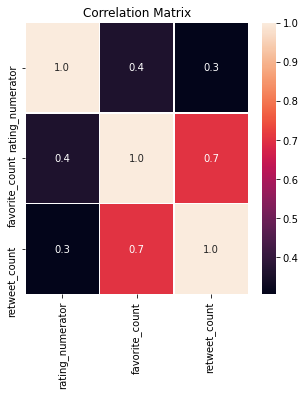

In [209]:
import seaborn as sns

f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(tw_master[['rating_numerator', 'favorite_count', 'retweet_count']].corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.title('Correlation Matrix');

In [210]:
df = tw_master[['rating_numerator', 'favorite_count', 'retweet_count']]
corr = df.corr()
corr.style.background_gradient()

,rating_numerator,favorite_count,retweet_count
rating_numerator,1.000000,0.361302,0.305336
favorite_count,0.361302,1.000000,0.702881
retweet_count,0.305336,0.702881,1.000000


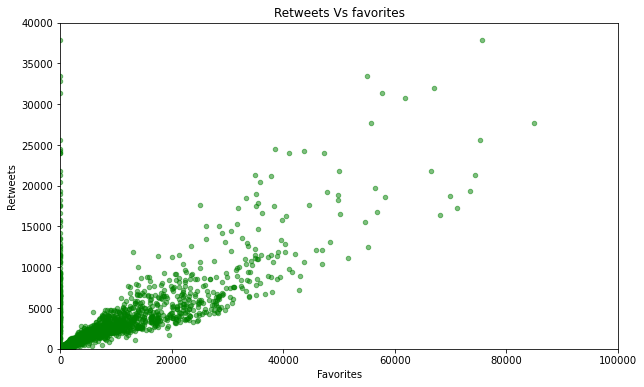

In [211]:
plt.rcParams['figure.figsize']=(10,6)

tw_master.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5, color = 'green')
plt.xlim((0,100000))
plt.ylim((0,40000))
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets Vs favorites');


#### It is normal to expect that not all favorited tweets were retweeted and vice versa. This caused the line of dots at the favorites value of zero. There is a linear relationship between the retweet counts and the favourite counts. The regression coefficient for this relationship is strong (r= 0.797). This relationship might be already expected as people will favourite what they retweet or the other way around. Interesting, the rating have a weak significant correlation (r = 0.371) with favorits but not that significant correlation with retweets. This indicates that people might favour high rated dogs. This causality relationship could be justified because the dogs are been rated by WeRateDogs first and before people react (by favouring or retweeting) to them.